Here we try to answer to a simple question which propably we had to answer few times while doing online shopping for example on Amazon.  

Everything else held equal,  
### $\fbox{Would you rather buy the product that has 100 reviews and its average rating is $4.1 \star$ out of $5$,  
or would you buy the other product that has 1000 reviews and its average rating is $4 \star$ ?}$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We are going to perform a Monte Carlo simulation for each product

In [3]:
def get_avg_rating(rating_distr, n):
    vals= np.random.random(n).reshape(-1,1)
    ratings= 1 + np.argmax(vals < rating_distr.cumsum(), axis=1)
    return ratings.mean()

# Small Sample (n=100 and 4.1 stars)

In [4]:
rating_distr_1= np.array([.05, .05, .05, .45, .4]) # change the distribution of ratings: play around with it [.05, .05, .05, .5, .35]
n1= 100 #change the sample size: play around with it and set it to a different number (1000)
small_samp_means = np.array([get_avg_rating(rating_distr_1, n1) for _ in range(10000)])

Text(0.5, 1.0, 'n=100 ')

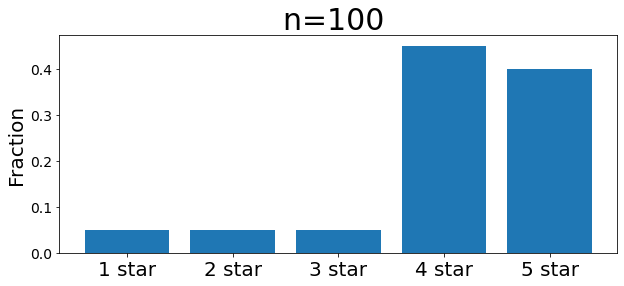

In [6]:
#distribution of ratings for the first product
#we assume that this is the TRUE distribution for the population (this is a hard assumption since 100 is small). If the sample size starts increasing, we will have 
# more confidence that the distribution you are seeing is close to the population distribution 
plt.figure(figsize=(10,4))
plt.bar([str(i)+' star' for i in np.arange(1,6)], rating_distr_1)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0,.5,.1), fontsize=14)
plt.ylabel('Fraction', fontsize=20)
plt.title('n=%s '%n1, fontsize=30)

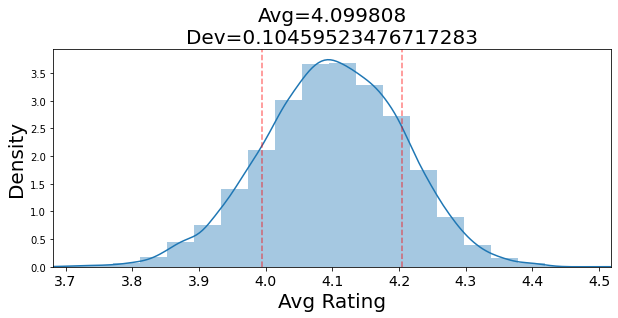

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(small_samp_means, bins=20)
plt.xlabel('Avg Rating', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(np.arange(0,5.1,.1), fontsize=14)
mu, dev = small_samp_means.mean(), small_samp_means.std()
plt.xlim(mu-4*dev, mu+4*dev)
plt.title('Avg=%s\nDev=%s'%(mu,dev), fontsize=20)
plt.axvline(mu+dev, color='r', linestyle='--', alpha=0.5)
plt.axvline(mu-dev, color='r', linestyle='--', alpha=0.5)

The above distribution is the average rating distribution for the first product after performing many MC runs. At each run we took 100 sample from the rating distribution and calculate the average.

Let's do the same analysis for the second product.

# Large Sample (n=1000 and 4 stars)

In [11]:
rating_distr_2= np.array([.05, .05, .05, .55, .3]) #change the distribution of ratings: play around with it
n2= 1000 #change the sample size: play around with it and set it to a different number (10000)
large_samp_means = np.array([get_avg_rating(rating_distr_2, n2) for _ in range(10000)])

Text(0.5, 1.0, 'n=1000 ')

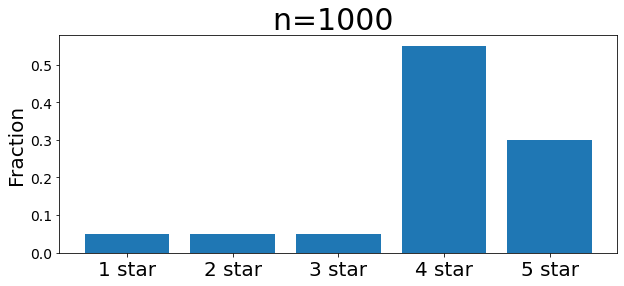

In [12]:
plt.figure(figsize=(10,4))
plt.bar([str(i)+' star' for i in np.arange(1,6)], rating_distr_2)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0,.6,.1), fontsize=14)
plt.ylabel('Fraction', fontsize=20)
plt.title('n=%s '%n2, fontsize=30)

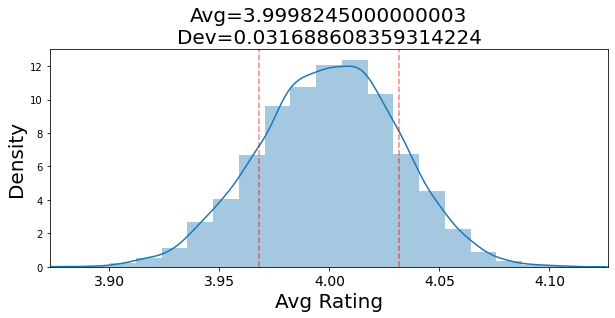

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(large_samp_means, bins=20)
plt.xlabel('Avg Rating', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(np.arange(0,5.05,.05), fontsize=14)
mu, dev = large_samp_means.mean(), large_samp_means.std()
plt.xlim(mu-4*dev, mu+4*dev)
plt.title('Avg=%s\nDev=%s'%(mu,dev), fontsize=20)
plt.axvline(mu+dev, color='r', linestyle='--', alpha=0.5)
plt.axvline(mu-dev, color='r', linestyle='--', alpha=0.5)

The above distribution is the average rating distribution for the second product after performing many MC runs. At each run we took 1000 sample from the rating distribution (instead of 100) and calculate the average.  
The standard deviation is smaller than that one for the first product.

# Plot both together

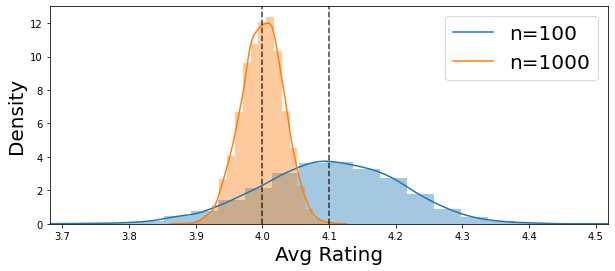

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(small_samp_means, bins=20)
sns.distplot(large_samp_means, bins=20)
plt.xlabel('Avg Rating', fontsize=20)
plt.ylabel('Density', fontsize=20)

mu,dev = small_samp_means.mean(), small_samp_means.std()
plt.xlim(mu-4*dev, mu+4*dev)
plt.legend(['n=%s'%n1, 'n=%s'%n2], fontsize=20)

plt.axvline(small_samp_means.mean(), color='k', linestyle='--', alpha=0.75)
plt.axvline(large_samp_means.mean(), color='k', linestyle='--', alpha=0.75)


We can see that the blue curve has larger standard deviation but it is generally ahead of the red curve, which, in turn, is more precise but is generally behind the blue curve.

Another look that we can do is: we did the same number of MC runs for the small sample size of 100 and the large sample size of 1000, so we can just take the difference between the average rating for each pair of runs if we line the runs up one by one.

Text(0.5, 1.0, 'P(small samp avg > large samp avg) = 0.82')

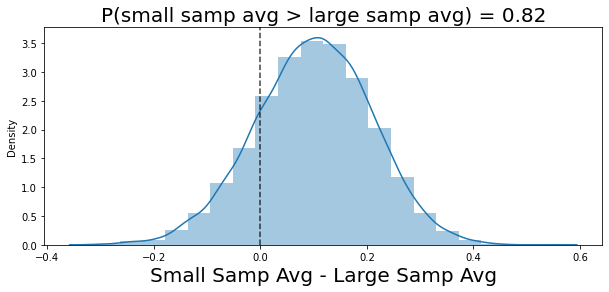

In [16]:
prob_large_samp_greater_small_samp = (small_samp_means > large_samp_means).mean()

plt.figure(figsize=(10,4))
sns.distplot(small_samp_means - large_samp_means, bins=20)
plt.xlabel('Small Samp Avg - Large Samp Avg', fontsize=20)
plt.axvline(0, color='k', alpha=0.75, linestyle='--')
plt.title('P(small samp avg > large samp avg) = %s'%round(prob_large_samp_greater_small_samp, 2), fontsize=20)

82% of this distribution lies above 0, namely 82% of the time the small sample average rating is above the large sample average rating.

_Based on this results, I would go for the first product_ if the criteria is the average rating.

---

## change the sample size

If the initial question changes to  
### $\fbox{Would you rather buy the product that has 1000 reviews and its average rating is $4.1 \star$ out of $5$,  
or would you buy the other product that has 10000 reviews and its average rating is $4 \star$ ?}$

In this case the standard deviation for the second product will shrink more than before, leaving less room for argument about which product is better. Clearly, the blue distribution (first product) is always/most of the times ahead of the red curve now.  
Now both sample sizes (1000 and 10000) are precise enough that the average rating we are seeing is a good indicator of whether the product is actually better than the other product.

---

## change the distribution of ratings

If the initial question stays the same but we change the distribution of ratings so that they are close to each other (e.g. change rating distribution for first prodcut to [.05, .05, .05, .5, .35]), how does our decision choice is affected?

In this case, we move the average rating for the small sample closer to the average for the large sample size. P(small samp avg > large samp avg)= 69%, so it is reduced compared to the initial example (82%). Now it becomes less certain which product we should pick.

---

To sum up, we have seen that consumer final choice depends not only on the difference in sample sizes but also on how close together the average ratings are.
